# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [3]:
#cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "faya"
units = "metric"
query_url = url + "appid=" + weather_api_key + "&q=" +city +"&units=" + units
query_url
query = requests.get(query_url).json()
query

{'coord': {'lon': 42.4509, 'lat': 18.3851},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 28.29,
  'feels_like': 28,
  'temp_min': 28.29,
  'temp_max': 31.06,
  'pressure': 1007,
  'humidity': 41,
  'sea_level': 1007,
  'grnd_level': 789},
 'visibility': 10000,
 'wind': {'speed': 1.38, 'deg': 265, 'gust': 4.42},
 'clouds': {'all': 93},
 'dt': 1693058539,
 'sys': {'type': 1,
  'id': 7396,
  'country': 'SA',
  'sunrise': 1693018476,
  'sunset': 1693063810},
 'timezone': 10800,
 'id': 110690,
 'name': 'Faya',
 'cod': 200}

In [63]:
#query['dt']

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" +city +"&units=" + units
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    city_weather = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | kursavka
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | the pas
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | egyek
Processing Record 10 of Set 1 | ad dabbah
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | xichang
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | blagodarnyy
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | hadibu
Processing Record 18 of Set 1 | le port
Processing Record 19 of Set 1 | nuuk
Processing Record 20 of Set 1 | mizdah
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | port blair
Processing Recor

In [8]:
#city_data

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,8.23,81,100,5.16,NZ,1693058857
1,kursavka,44.4564,42.5093,26.89,27,10,4.99,RU,1693058858
2,edinburgh of the seven seas,-37.0676,-12.3116,15.21,85,99,15.22,SH,1693058859
3,ancud,-41.8697,-73.8203,5.26,72,6,2.47,CL,1693058859
4,blackmans bay,-43.0167,147.3167,4.29,88,50,1.68,AU,1693058665


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.23,81,100,5.16,NZ,1693058857
1,kursavka,44.4564,42.5093,26.89,27,10,4.99,RU,1693058858
2,edinburgh of the seven seas,-37.0676,-12.3116,15.21,85,99,15.22,SH,1693058859
3,ancud,-41.8697,-73.8203,5.26,72,6,2.47,CL,1693058859
4,blackmans bay,-43.0167,147.3167,4.29,88,50,1.68,AU,1693058665


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

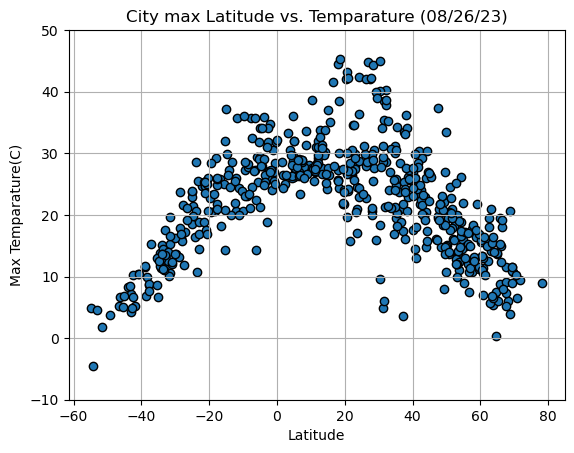

In [32]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temparature(C)')
plt.ylim(-10,50)
plt.title(f"City max Latitude vs. Temparature ({time.strftime('%m/%d/%y')})")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

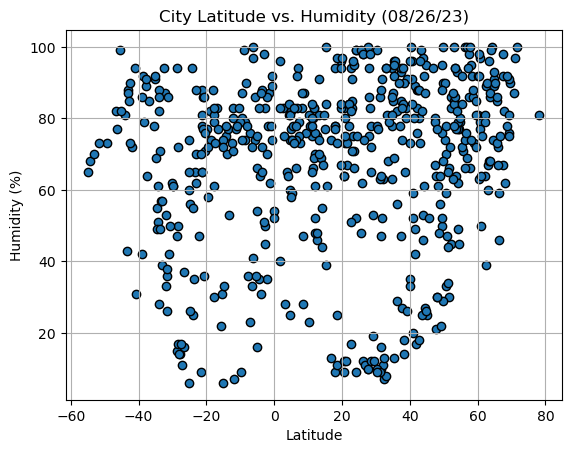

In [31]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%y')})")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

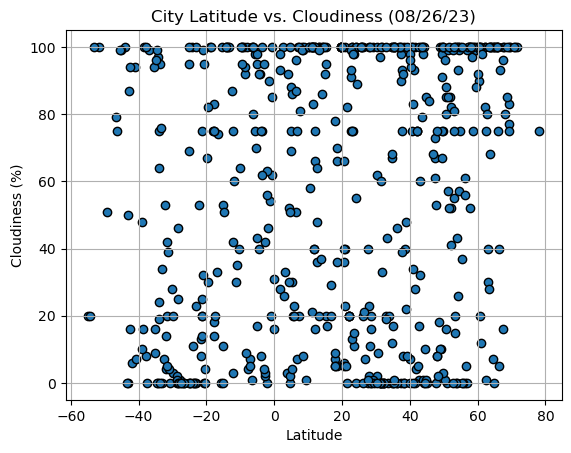

In [33]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%y')})")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

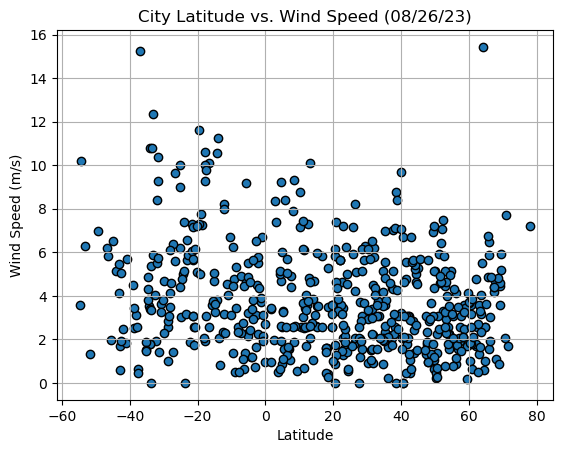

In [30]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%y')})")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    #plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kursavka,44.4564,42.5093,26.89,27,10,4.99,RU,1693058858
6,the pas,53.8251,-101.2541,11.01,93,0,2.57,CA,1693058632
7,enewetak,11.3474,162.3373,27.23,80,100,6.12,MH,1693058862
8,egyek,47.6333,20.9000,37.40,21,0,2.34,HU,1693058863
9,ad dabbah,18.0500,30.9500,44.53,9,7,1.59,SD,1693058864


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.23,81,100,5.16,NZ,1693058857
2,edinburgh of the seven seas,-37.0676,-12.3116,15.21,85,99,15.22,SH,1693058859
3,ancud,-41.8697,-73.8203,5.26,72,6,2.47,CL,1693058859
4,blackmans bay,-43.0167,147.3167,4.29,88,50,1.68,AU,1693058665
5,port elizabeth,-33.9180,25.5701,15.05,82,75,10.80,ZA,1693058861


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6982021161811092


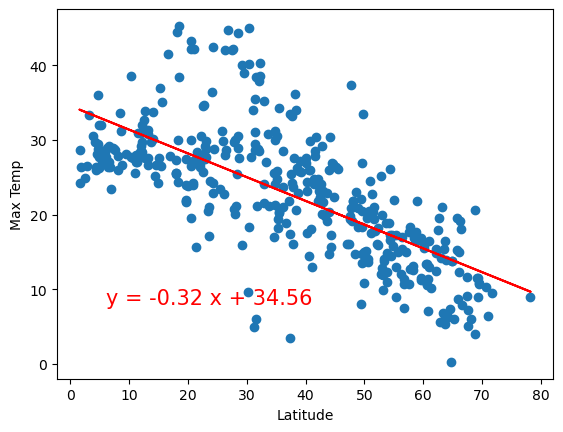

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values,"title",(6,8))

The r-squared is: 0.8723317860014407


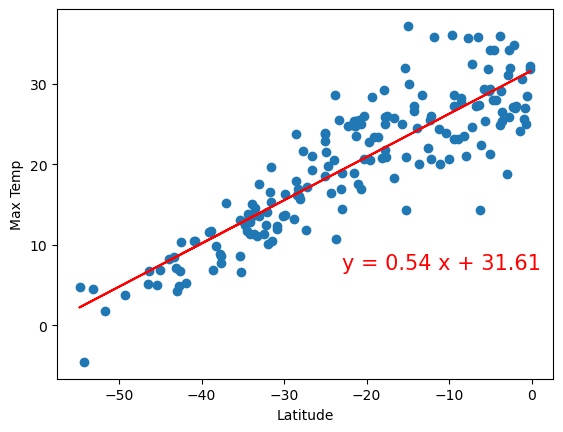

In [47]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values,"title",(-23,7))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [4]:
print("When considering  Linear regression on Southern Hemisphere, The relationship between latitude and maximum temperature is positively correlated, and the correlation is notably strong.")

When considering  Linear regression on Southern Hemisphere, The relationship between latitude and maximum temperature is positively correlated, and the correlation is notably strong.


In [5]:
"Considering Linear regression on Northern Hemisphere, The relationship between latitude and maximum temperature is negatively correlated,and there also have good corelation. And also notice, few outliers."

'Considering Linear regression on Northern Hemisphere, The relationship between latitude and maximum temperature is negatively correlated,and there also have good corelation. And also notice, few outliers.'

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.13847046297179313


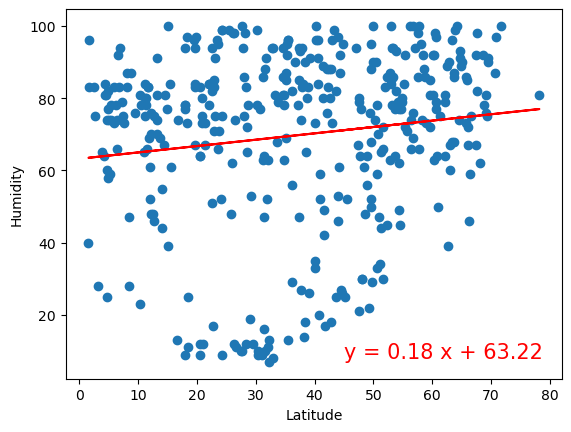

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values,"title",(45,8))

The r-squared is: -0.01817108590642622


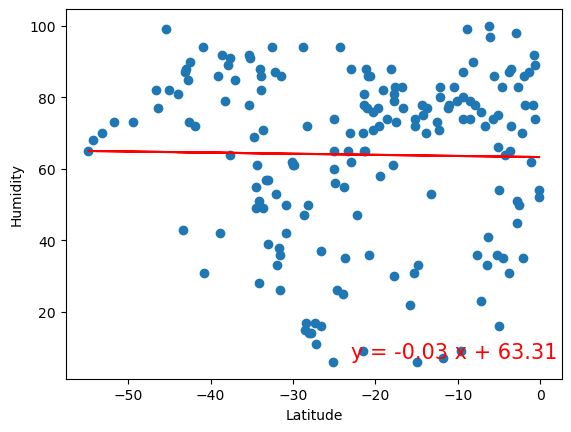

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values,"title",(-23,7))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [10]:
"The Northern Hemisphere plot shows a positive correlation between latitude and humidity and, there isn't a strong correlation.According to the Southern Hemisphere plot, there is a negative correlation between latitude and humidity and a weak correlation."

"The Northern Hemisphere plot shows a positive correlation between latitude and humidity and, there isn't a strong correlation.According to the Southern Hemisphere plot, there is a negative correlation between latitude and humidity and a weak correlation."

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.13517933442588903


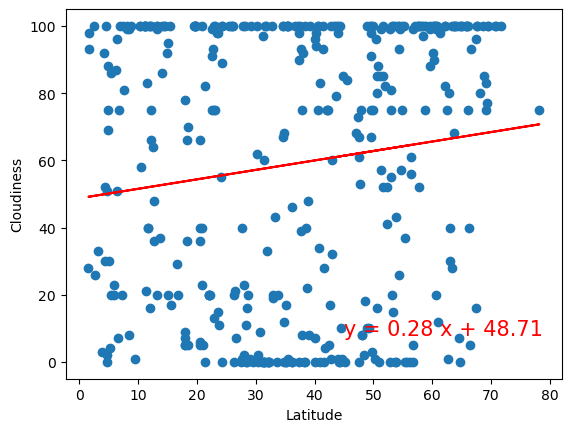

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values,"title",(45,8))

The r-squared is: 0.14385171879323985


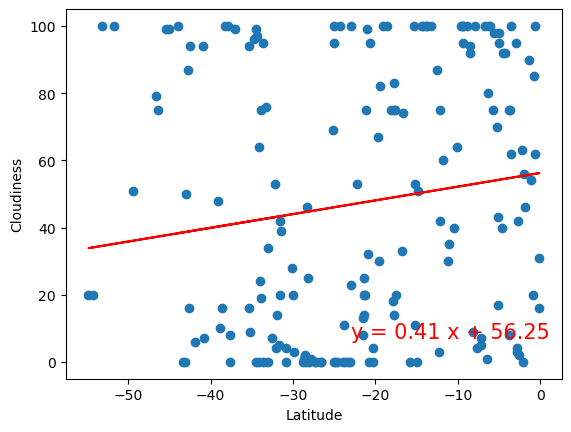

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values,"title",(-23,7))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [11]:
"Both graphs have positive correlation and both have weak correlation between latitude and cloudiness."  

'Both graphs have positive correlation and both have weak correlation between latitude and cloudiness.'

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.05105553093521965


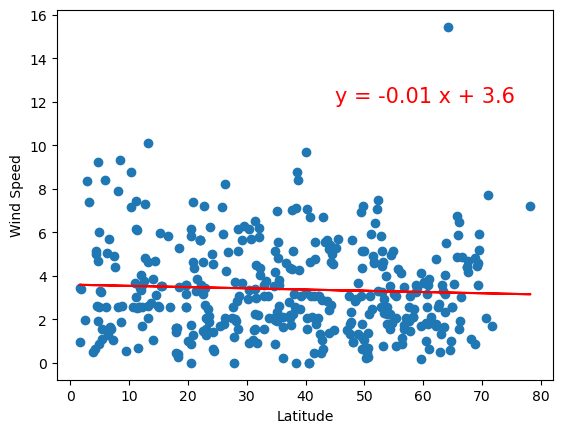

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values,"title",(45,12))

The r-squared is: -0.10959181025172925


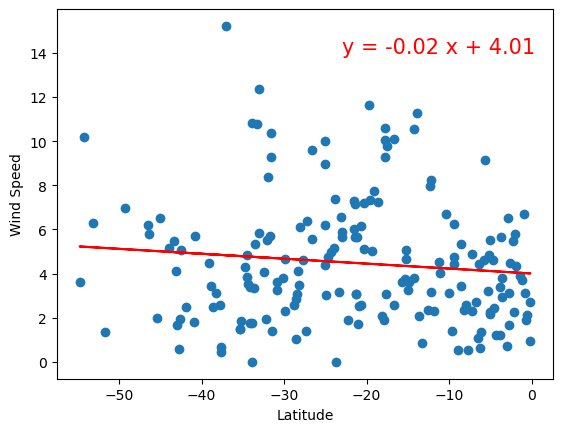

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values,"title",(-23,14))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [12]:
"Both graphs haven't strong correlation between latitude and wind speed. And there are many oulliers." 

"Both graphs haven't strong correlation between latitude and wind speed. And there are many oulliers."